In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [107]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Input, BatchNormalization
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16

import numpy as np


print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


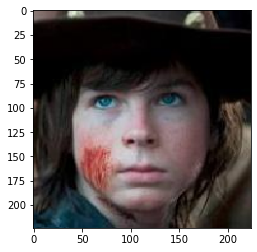

In [108]:
def get_image(filename):
  
    image = load_img(filename, target_size=(224, 224))
    np_image = img_to_array(image)
    return np_image


import matplotlib.pyplot as plt
%matplotlib inline

image = get_image('../image_affectnet/train_class/class001/image0000002.jpg')
plt.imshow(np.uint8(image))
plt.show()

In [109]:
train_data_gen= ImageDataGenerator(rotation_range=10,
        rescale=1./255,
        horizontal_flip=True,
        ) 
validation_data_gen=ImageDataGenerator(rescale=1./255)

# train and validation directory
train_dir="../image_affectnet/train_class"
val_dir="../image_affectnet/val_class"

bs=64
cm="categorical"

train_gen=train_data_gen.flow_from_directory(train_dir,target_size=(224,224),batch_size=bs,class_mode=cm)
val_gen=validation_data_gen.flow_from_directory(val_dir,target_size=(224,224),batch_size=bs,class_mode=cm)

Found 15000 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [35]:
def create_model(opt,input_tensor):
    model_vgg16= VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)
    
    top_model = Sequential()
    top_model.add(Flatten())
    top_model.add(Dense(512, activation='relu',kernel_initializer='he_normal'))
    top_model.add(BatchNormalization())
    top_model.add(Dropout(0.2))    
    top_model.add(Dense(3, activation='softmax'))   # 3 classes

    # Connect vgg16 and top_model
    model = Model(inputs=model_vgg16.input, outputs=top_model(model_vgg16.output))

    # Fix layers
    for layer in model.layers[:15]:
        layer.trainable = False
    

    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    #model.summary()
    
    return model

In [36]:
def fit_model(model,bs,epoch,model_name):
    no_train_img=15000
    no_val_img=1500
    epochs=epoch
    batch_size=bs

    #early_stop = EarlyStopping(monitor='val_loss',  patience=3, verbose=1)

    h=model.fit(
           train_gen,
            steps_per_epoch=no_train_img // batch_size,
            epochs=epochs,
            validation_data=val_gen,
            validation_steps=no_val_img // batch_size,
             verbose=1
            )
    model.save(model_name)

    #print(history.history.keys())
    # summarize history for accuracy
   
    
    return h

### Tune with learning rate


In [37]:
lr=0.001
input_tensor=Input(shape=(224,224,3))
opt = keras.optimizers.Adam(lr)
model=create_model(opt,input_tensor)
h=fit_model(model,bs, 10,"vgg16_001")




Epoch 1/10
234/234 [==============================] - 474s 2s/step - loss: 0.7635 - accuracy: 0.6617 - val_loss: 0.9647 - val_accuracy: 0.6196
Epoch 2/10
234/234 [==============================] - 468s 2s/step - loss: 0.6054 - accuracy: 0.7310 - val_loss: 0.5455 - val_accuracy: 0.7582
Epoch 3/10
234/234 [==============================] - 470s 2s/step - loss: 0.5683 - accuracy: 0.7487 - val_loss: 1.9213 - val_accuracy: 0.4375
Epoch 4/10
234/234 [==============================] - 472s 2s/step - loss: 0.5407 - accuracy: 0.7623 - val_loss: 0.6512 - val_accuracy: 0.7330
Epoch 5/10
234/234 [==============================] - 467s 2s/step - loss: 0.5141 - accuracy: 0.7748 - val_loss: 0.5515 - val_accuracy: 0.7670
Epoch 6/10
234/234 [==============================] - 468s 2s/step - loss: 0.4912 - accuracy: 0.7838 - val_loss: 0.5635 - val_accuracy: 0.7507
Epoch 7/10
234/234 [==============================] - 470s 2s/step - loss: 0.4631 - accuracy: 0.7989 - val_loss: 0.7304 - val_accuracy: 0.7045

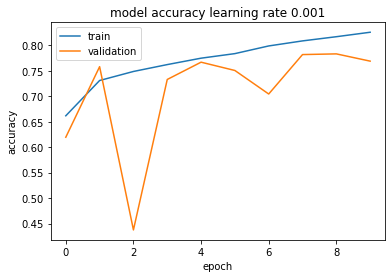

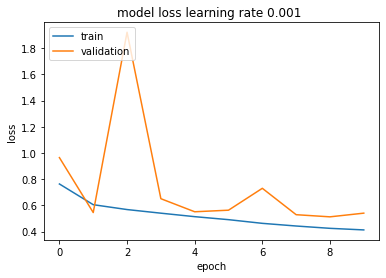

In [38]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy learning rate 0.001',)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss learning rate 0.001 ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

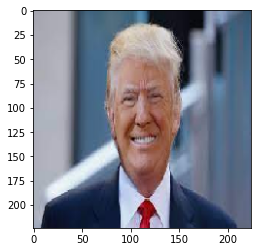

[[0. 1. 0.]]
1


In [45]:

#0: neutral , 1:happy, 2: sad
filename="trump_smile.jpg"
image = load_img(filename, target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
plt.imshow(np.uint8(image))
plt.show()
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model

# predict the probability across all output classes
yhat = model.predict(image)
print(yhat)

print(np.argmax(yhat))

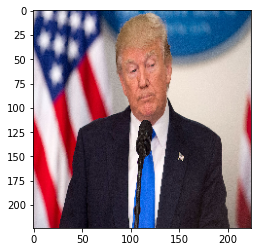

[[1.0000000e+00 3.0397481e-22 0.0000000e+00]]
0


In [46]:

#0: neutral , 1:happy, 2: sad
filename="trump_sad.jpg"
image = load_img(filename, target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
plt.imshow(np.uint8(image))
plt.show()
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))


# predict the probability across all output classes
yhat = model.predict(image)
print(yhat)

print(np.argmax(yhat))

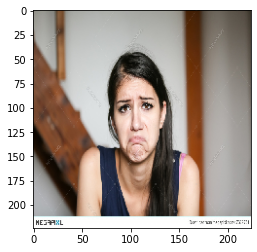

[[0. 1. 0.]]
1


In [47]:
#0: neutral , 1:happy, 2: sad
filename="sad_face.jpg"
image = load_img(filename, target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
plt.imshow(np.uint8(image))
plt.show()
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))


# predict the probability across all output classes
yhat = model.predict(image)
print(yhat)

print(np.argmax(yhat))

In [49]:
# test with lr 0.0001
lr=0.0001
input_tensor=Input(shape=(224,224,3))
opt = keras.optimizers.Adam(lr)
model=create_model(opt,input_tensor)
h=fit_model(model,bs, 10,"vgg16_0001")


Epoch 1/10
234/234 [==============================] - 464s 2s/step - loss: 0.7910 - accuracy: 0.6638 - val_loss: 0.8238 - val_accuracy: 0.6617
Epoch 2/10
234/234 [==============================] - 466s 2s/step - loss: 0.5997 - accuracy: 0.7373 - val_loss: 0.7279 - val_accuracy: 0.6902
Epoch 3/10
234/234 [==============================] - 466s 2s/step - loss: 0.5487 - accuracy: 0.7621 - val_loss: 0.5860 - val_accuracy: 0.7493
Epoch 4/10
234/234 [==============================] - 464s 2s/step - loss: 0.5048 - accuracy: 0.7847 - val_loss: 0.5451 - val_accuracy: 0.7622
Epoch 5/10
234/234 [==============================] - 465s 2s/step - loss: 0.4681 - accuracy: 0.7990 - val_loss: 0.5387 - val_accuracy: 0.7751
Epoch 6/10
234/234 [==============================] - 466s 2s/step - loss: 0.4353 - accuracy: 0.8141 - val_loss: 0.6077 - val_accuracy: 0.7568
Epoch 7/10
234/234 [==============================] - 464s 2s/step - loss: 0.3818 - accuracy: 0.8368 - val_loss: 0.6366 - val_accuracy: 0.7738

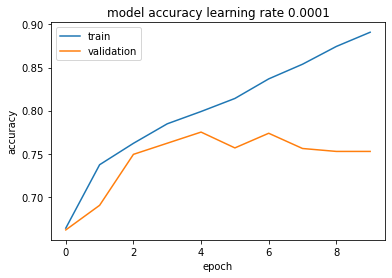

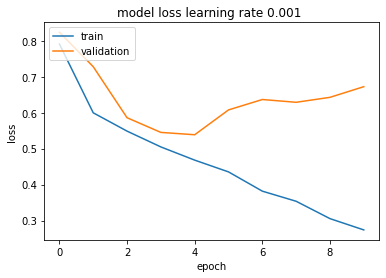

In [50]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy learning rate 0.0001',)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss learning rate 0.001 ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [51]:
# test with lr 0.00001
lr=0.00001
input_tensor=Input(shape=(224,224,3))
opt = keras.optimizers.Adam(lr)
model=create_model(opt,input_tensor)
h=fit_model(model,bs, 10,"vgg16_00001")


Epoch 1/10
234/234 [==============================] - 469s 2s/step - loss: 0.9248 - accuracy: 0.5979 - val_loss: 0.7128 - val_accuracy: 0.6841
Epoch 2/10
234/234 [==============================] - 462s 2s/step - loss: 0.7146 - accuracy: 0.6855 - val_loss: 0.6551 - val_accuracy: 0.7113
Epoch 3/10
234/234 [==============================] - 444s 2s/step - loss: 0.6370 - accuracy: 0.7221 - val_loss: 0.6730 - val_accuracy: 0.7052
Epoch 4/10
234/234 [==============================] - 448s 2s/step - loss: 0.5811 - accuracy: 0.7484 - val_loss: 0.6549 - val_accuracy: 0.7188
Epoch 5/10
234/234 [==============================] - 448s 2s/step - loss: 0.5472 - accuracy: 0.7627 - val_loss: 0.5982 - val_accuracy: 0.7446
Epoch 6/10
234/234 [==============================] - 453s 2s/step - loss: 0.5048 - accuracy: 0.7861 - val_loss: 0.6344 - val_accuracy: 0.7405
Epoch 7/10
234/234 [==============================] - 450s 2s/step - loss: 0.4722 - accuracy: 0.7999 - val_loss: 0.6638 - val_accuracy: 0.7337

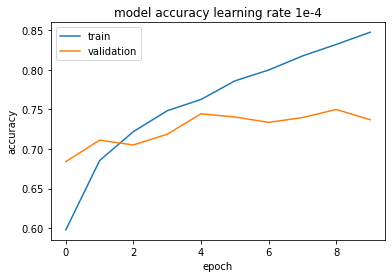

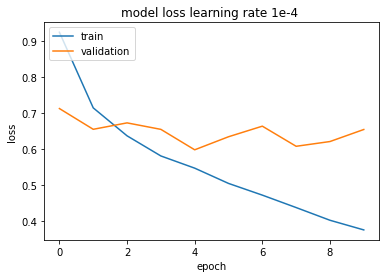

In [52]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy learning rate 1e-4',)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss learning rate 1e-4 ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Tune with optimizer

In [53]:
# test with lr 0.00001 , epsilon= 1e-4, default epsilon =1e-7
lr=0.00001
ep_=1e-4
input_tensor=Input(shape=(224,224,3))
opt = keras.optimizers.Adam(lr, epsilon=ep_)
model=create_model(opt,input_tensor)
h=fit_model(model,bs, 10,"vgg16_00001_ep_00004")

Epoch 1/10
234/234 [==============================] - 446s 2s/step - loss: 0.9505 - accuracy: 0.5915 - val_loss: 0.7013 - val_accuracy: 0.6780
Epoch 2/10
234/234 [==============================] - 447s 2s/step - loss: 0.7237 - accuracy: 0.6865 - val_loss: 0.6890 - val_accuracy: 0.7045
Epoch 3/10
234/234 [==============================] - 472s 2s/step - loss: 0.6554 - accuracy: 0.7142 - val_loss: 0.6447 - val_accuracy: 0.7167
Epoch 4/10
234/234 [==============================] - 468s 2s/step - loss: 0.5820 - accuracy: 0.7471 - val_loss: 0.6427 - val_accuracy: 0.7194
Epoch 5/10
234/234 [==============================] - 461s 2s/step - loss: 0.5491 - accuracy: 0.7637 - val_loss: 0.6308 - val_accuracy: 0.7276
Epoch 6/10
234/234 [==============================] - 464s 2s/step - loss: 0.5080 - accuracy: 0.7881 - val_loss: 0.7310 - val_accuracy: 0.6970
Epoch 7/10
234/234 [==============================] - 472s 2s/step - loss: 0.4719 - accuracy: 0.8001 - val_loss: 0.6703 - val_accuracy: 0.7235

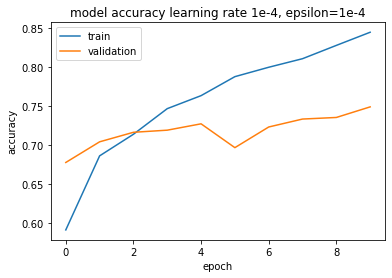

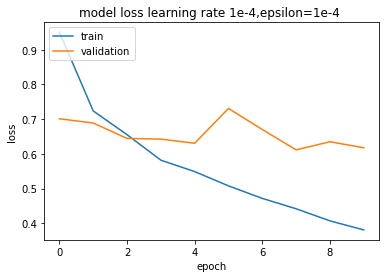

In [54]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy learning rate 1e-4, epsilon=1e-4',)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss learning rate 1e-4,epsilon=1e-4 ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [55]:
# test with lr 0.00001 , epsilon= 1e-4, default epsilon =1e-7
lr=0.00001
ep_=1e-8
input_tensor=Input(shape=(224,224,3))
opt = keras.optimizers.Adam(lr, epsilon=ep_)
model=create_model(opt,input_tensor)
h=fit_model(model,bs, 10,"vgg16_00001_ep_e8")

Epoch 1/10
234/234 [==============================] - 455s 2s/step - loss: 0.9286 - accuracy: 0.5979 - val_loss: 0.6882 - val_accuracy: 0.6834
Epoch 2/10
234/234 [==============================] - 459s 2s/step - loss: 0.7197 - accuracy: 0.6844 - val_loss: 0.7626 - val_accuracy: 0.6562
Epoch 3/10
234/234 [==============================] - 460s 2s/step - loss: 0.6339 - accuracy: 0.7285 - val_loss: 0.6731 - val_accuracy: 0.7052
Epoch 4/10
234/234 [==============================] - 459s 2s/step - loss: 0.5902 - accuracy: 0.7472 - val_loss: 0.6074 - val_accuracy: 0.7269
Epoch 5/10
234/234 [==============================] - 459s 2s/step - loss: 0.5378 - accuracy: 0.7732 - val_loss: 0.6152 - val_accuracy: 0.7364
Epoch 6/10
234/234 [==============================] - 460s 2s/step - loss: 0.4941 - accuracy: 0.7887 - val_loss: 0.6184 - val_accuracy: 0.7405
Epoch 7/10
234/234 [==============================] - 459s 2s/step - loss: 0.4710 - accuracy: 0.8026 - val_loss: 0.6396 - val_accuracy: 0.7242

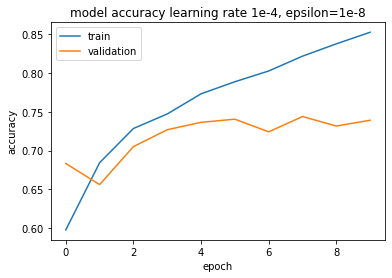

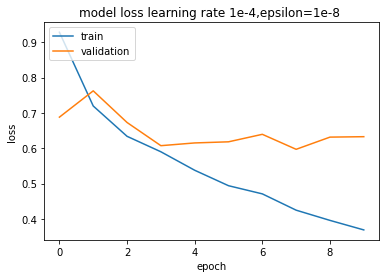

In [56]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy learning rate 1e-4, epsilon=1e-8',)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss learning rate 1e-4,epsilon=1e-8 ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [59]:
# test with lr 0.00001 , epsilon=0.1fault epsilon =1e-7
lr=0.00001
ep_=1e-8
input_tensor=Input(shape=(224,224,3))
opt = keras.optimizers.Adam(lr, epsilon=ep_)
model=create_model(opt,input_tensor)
h=fit_model(model,bs, 10,"vgg16_00001_ep_01")

Epoch 1/10
234/234 [==============================] - 456s 2s/step - loss: 0.9170 - accuracy: 0.6016 - val_loss: 0.6927 - val_accuracy: 0.6889
Epoch 2/10
234/234 [==============================] - 457s 2s/step - loss: 0.7093 - accuracy: 0.6927 - val_loss: 0.6700 - val_accuracy: 0.7154
Epoch 3/10
234/234 [==============================] - 461s 2s/step - loss: 0.6373 - accuracy: 0.7208 - val_loss: 0.6689 - val_accuracy: 0.7289
Epoch 4/10
234/234 [==============================] - 459s 2s/step - loss: 0.5791 - accuracy: 0.7500 - val_loss: 0.6176 - val_accuracy: 0.7466
Epoch 5/10
234/234 [==============================] - 461s 2s/step - loss: 0.5238 - accuracy: 0.7734 - val_loss: 0.6272 - val_accuracy: 0.7432
Epoch 6/10
234/234 [==============================] - 461s 2s/step - loss: 0.4990 - accuracy: 0.7863 - val_loss: 0.5985 - val_accuracy: 0.7486
Epoch 7/10
234/234 [==============================] - 457s 2s/step - loss: 0.4597 - accuracy: 0.8067 - val_loss: 0.6381 - val_accuracy: 0.7480

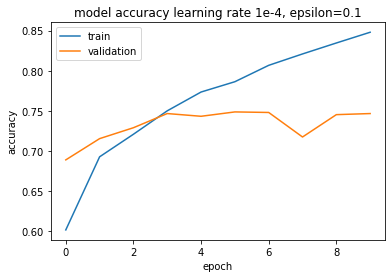

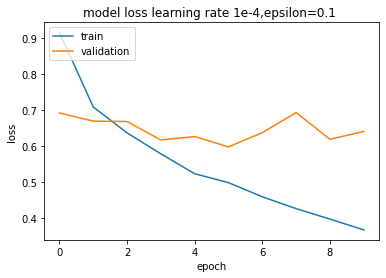

In [60]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy learning rate 1e-4, epsilon=0.1',)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss learning rate 1e-4,epsilon=0.1 ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [61]:
# test with lr 0.00001 , epsilon= 1, default epsilon =1e-7
lr=0.1
ep_=1
input_tensor=Input(shape=(224,224,3))
opt = keras.optimizers.Adam(lr, epsilon=ep_)
model=create_model(opt,input_tensor)
h=fit_model(model,bs, 10,"vgg16_00001_ep_1")

Epoch 1/10
234/234 [==============================] - 458s 2s/step - loss: 0.7731 - accuracy: 0.6641 - val_loss: 0.6407 - val_accuracy: 0.7181
Epoch 2/10
234/234 [==============================] - 456s 2s/step - loss: 0.6011 - accuracy: 0.7333 - val_loss: 0.6053 - val_accuracy: 0.7351
Epoch 3/10
234/234 [==============================] - 457s 2s/step - loss: 0.5659 - accuracy: 0.7489 - val_loss: 0.8912 - val_accuracy: 0.6264
Epoch 4/10
234/234 [==============================] - 458s 2s/step - loss: 0.5329 - accuracy: 0.7690 - val_loss: 0.5615 - val_accuracy: 0.7629
Epoch 5/10
234/234 [==============================] - 455s 2s/step - loss: 0.5045 - accuracy: 0.7791 - val_loss: 0.5577 - val_accuracy: 0.7697
Epoch 6/10
234/234 [==============================] - 457s 2s/step - loss: 0.4923 - accuracy: 0.7867 - val_loss: 0.5035 - val_accuracy: 0.7792
Epoch 7/10
234/234 [==============================] - 458s 2s/step - loss: 0.4754 - accuracy: 0.7928 - val_loss: 0.5588 - val_accuracy: 0.7527

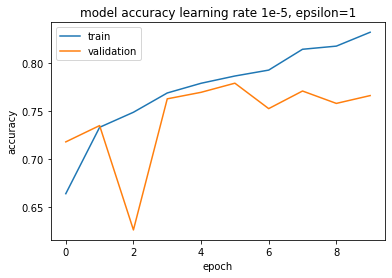

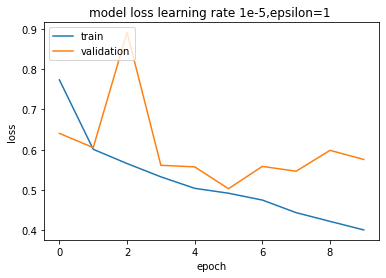

In [62]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy learning rate 1e-5, epsilon=1',)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss learning rate 1e-5,epsilon=1 ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [95]:
def predict(model,filename):
    image = load_img(filename, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
   
     # reshape data for the model
    inputs = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

    # predict the probability across all output classes
    yhat = model.predict(inputs )
    print(yhat)

    print(np.argmax(yhat))
    
    if ((np.argmax(yhat))==0):
        print("Neutral")
    if ((np.argmax(yhat))==1):
        print("Happy")
    if ((np.argmax(yhat))==2):
         print("Sad")
    
    
    plt.imshow(np.uint8(image))
    plt.show()
   



## F1 score


In [110]:
#load model
test_model = keras.models.load_model("./vgg16_00001_ep_1")

In [143]:
predictions=test_model.predict(val_gen,steps=1500//64,verbose=1)

23/23 [==============================] - 6s 240ms/step


In [142]:
predictions.shape

(1436, 3)

In [144]:
#sanity check
predictions[1]

array([0.94311714, 0.02887248, 0.02801042], dtype=float32)

In [145]:
print(type(predictions), type(predictions[1]))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [146]:

test_labels = []

for i in range(0,1500//64):
    test_labels.extend(np.array(val_gen[i][1]))

In [147]:
len(test_labels)

1472

In [148]:
true_label=np.zeros((1436,3))
for i in range(1436):
    true_label[i]=test_labels[i]
print(true_label.shape, test_labels[1].shape, true_label[1])

(1436, 3) (3,) [1. 0. 0.]


In [149]:
for i in range(5):
    print(true_label[i])
print(true_label[64])

[0. 0. 1.]
[1. 0. 0.]
[0. 1. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 1. 0.]


In [150]:
#sanity check
x,y= val_gen[0]
print(y)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [151]:
true_label_=true_label
predictions_=predictions
true_label.shape

(1436, 3)

In [99]:
i=0
y_true=[]
y_pred=[]
while i!=1436:
    y_true.append(np.argmax(true_label_[i]))
    y_pred.append(np.argmax(predictions_[i]))
    i=i+1
print(len(y_true), len(y_pred))

1436 1436


In [152]:
print(y_true[:10])
print(y_pred[:10])

[1, 1, 2, 2, 0, 2, 1, 0, 1, 0]
[1, 1, 2, 2, 0, 2, 0, 2, 2, 2]


In [153]:
val_gen.class_indices

{'class001': 0, 'class002': 1, 'class003': 2}

In [154]:
targe_class={'neutral': 0, 'happy': 1, 'sad': 2}
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=targe_class))
         


              precision    recall  f1-score   support

     neutral       0.32      0.31      0.31       479
       happy       0.32      0.31      0.31       478
         sad       0.32      0.34      0.33       479

    accuracy                           0.32      1436
   macro avg       0.32      0.32      0.32      1436
weighted avg       0.32      0.32      0.32      1436



## Predictions,VGG16+CNN, lr=1e-5, epsilon=1, kernel_intializer=he_normal


[[0. 1. 0.]]
1
Happy


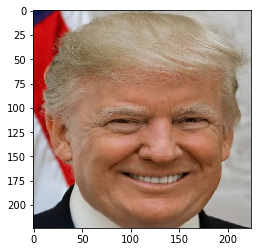

In [96]:
filename="trump_happy_crop.jpg"
predict(model,filename)

[[1.000000e+00 0.000000e+00 3.218822e-12]]
0
Neutral


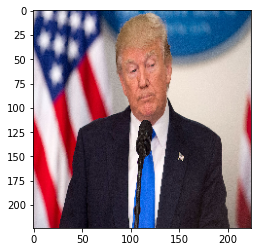

In [90]:
filename="trump_sad.jpg"
predict(model,filename)

[[0.         0.0091819  0.99081814]]
2
Sad


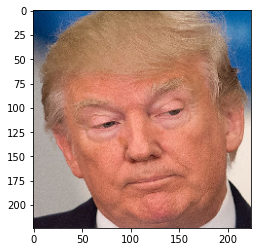

In [91]:
filename="trump_sad_crop.jpg"
predict(model,filename)

[[0. 0. 1.]]
2
Sad


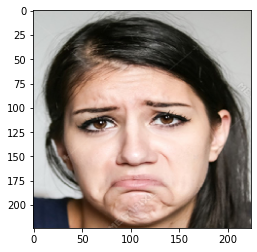

In [92]:
filename="sad_face_crop.jpg"
predict(model,filename)

[[1.1618836e-17 0.0000000e+00 1.0000000e+00]]
2
Sad


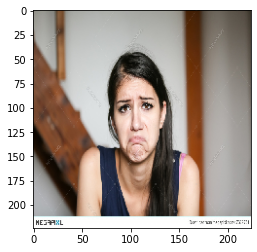

In [93]:
filename="sad_face.jpg"
predict(model,filename)

[[0. 1. 0.]]
1
Happy


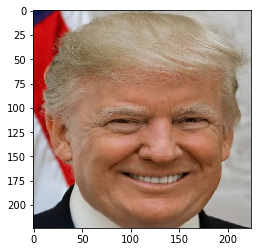

In [97]:
predict(test_model,filename)